## [D1110 과제]

- 대구지역의 인구 /구별로
    - (1) 성별 인구 비율
    - (2) 투표 가능 인구  나이 데이터 없음 
    - (3) 학령 인구      나이 데이터 없음

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['axes.unicode_minus'] = False


#  데이터 불러오기 및 정리

df = pd.read_csv("../Data/202011_202510_주민등록인구및세대현황_월간.csv", encoding='utf-8')

# '대구광역시' 제거 및 괄호 안 행정코드 삭제
df['구군'] = df['행정구역'].str.replace('대구광역시', '', regex=False)
df['구군'] = df['구군'].str.replace(r'\(.*\)', '', regex=True).str.strip()
df.loc[df['구군'] == '', '구군'] = '대구 전체'

# 대구 전체 제외
df = df[df['구군'] != '대구 전체']

# 인구 관련 컬럼만 추출 
pop_cols = [c for c in df.columns if '거주자 인구수' in c] 
male_cols = [c for c in df.columns if '남자 인구수' in c] 
female_cols = [c for c in df.columns if '여자 인구수' in c]

print(pop_cols)

display(df)

['2020년11월_거주자 인구수', '2020년12월_거주자 인구수', '2021년01월_거주자 인구수', '2021년02월_거주자 인구수', '2021년03월_거주자 인구수', '2021년04월_거주자 인구수', '2021년05월_거주자 인구수', '2021년06월_거주자 인구수', '2021년07월_거주자 인구수', '2021년08월_거주자 인구수', '2021년09월_거주자 인구수', '2021년10월_거주자 인구수', '2021년11월_거주자 인구수', '2021년12월_거주자 인구수', '2022년01월_거주자 인구수', '2022년02월_거주자 인구수', '2022년03월_거주자 인구수', '2022년04월_거주자 인구수', '2022년05월_거주자 인구수', '2022년06월_거주자 인구수', '2022년07월_거주자 인구수', '2022년08월_거주자 인구수', '2022년09월_거주자 인구수', '2022년10월_거주자 인구수', '2022년11월_거주자 인구수', '2022년12월_거주자 인구수', '2023년01월_거주자 인구수', '2023년02월_거주자 인구수', '2023년03월_거주자 인구수', '2023년04월_거주자 인구수', '2023년05월_거주자 인구수', '2023년06월_거주자 인구수', '2023년07월_거주자 인구수', '2023년08월_거주자 인구수', '2023년09월_거주자 인구수', '2023년10월_거주자 인구수', '2023년11월_거주자 인구수', '2023년12월_거주자 인구수', '2024년01월_거주자 인구수', '2024년02월_거주자 인구수', '2024년03월_거주자 인구수', '2024년04월_거주자 인구수', '2024년05월_거주자 인구수', '2024년06월_거주자 인구수', '2024년07월_거주자 인구수', '2024년08월_거주자 인구수', '2024년09월_거주자 인구수', '2024년10월_거주자 인구수', '2024년11월_거주자 인구수', '2024년12월_거주자 인구수',

,행정구역,2020년11월_거주자 인구수,2020년11월_세대수,2020년11월_세대당 인구,2020년11월_남자 인구수,2020년11월_여자 인구수,2020년11월_남여 비율,2020년12월_거주자 인구수,2020년12월_세대수,2020년12월_세대당 인구,...,2025년09월_남자 인구수,2025년09월_여자 인구수,2025년09월_남여 비율,2025년10월_거주자 인구수,2025년10월_세대수,2025년10월_세대당 인구,2025년10월_남자 인구수,2025년10월_여자 인구수,2025년10월_남여 비율,구군
1,대구광역시 중구 (2711000000),"75,354","37,882",1.99,"36,293","39,061",0.93,"75,175","37,890",1.98,...,"47,876","52,323",0.92,"100,308","49,805",2.01,"47,912","52,396",0.91,중구
2,대구광역시 동구 (2714000000),"339,585","153,138",2.22,"167,196","172,389",0.97,"339,066","153,400",2.21,...,"165,318","173,335",0.95,"338,386","164,411",2.06,"165,173","173,213",0.95,동구
3,대구광역시 서구 (2717000000),"169,148","81,580",2.07,"84,688","84,460",1.00,"168,791","81,704",2.07,...,"80,033","81,738",0.98,"162,651","84,164",1.93,"80,463","82,188",0.98,서구
4,대구광역시 남구 (2720000000),"144,508","74,557",1.94,"69,452","75,056",0.93,"144,469","74,738",1.93,...,"64,263","70,889",0.91,"134,863","74,748",1.80,"64,087","70,776",0.91,남구
5,대구광역시 북구 (2723000000),"438,243","184,806",2.37,"218,125","220,118",0.99,"437,760","185,300",2.36,...,"202,750","207,342",0.98,"409,839","192,147",2.13,"202,642","207,197",0.98,북구
6,대구광역시 수성구 (2726000000),"422,099","168,315",2.51,"204,225","217,874",0.94,"421,436","168,548",2.50,...,"196,068","212,080",0.92,"408,186","175,536",2.33,"196,053","212,133",0.92,수성구
7,대구광역시 달서구 (2729000000),"557,726","232,990",2.39,"275,094","282,632",0.97,"555,971","233,033",2.39,...,"253,140","264,419",0.96,"517,001","237,579",2.18,"252,867","264,134",0.96,달서구
8,대구광역시 달성군 (2771000000),"258,056","106,643",2.42,"130,994","127,062",1.03,"258,442","107,195",2.41,...,"129,040","125,742",1.03,"254,527","113,506",2.24,"128,903","125,624",1.03,달성군
9,대구광역시 군위군 (2772000000),0,0,0.00,0,0,0.00,0,0,0.00,...,"11,585","10,714",1.08,"22,281","13,388",1.66,"11,586","10,695",1.08,군위군


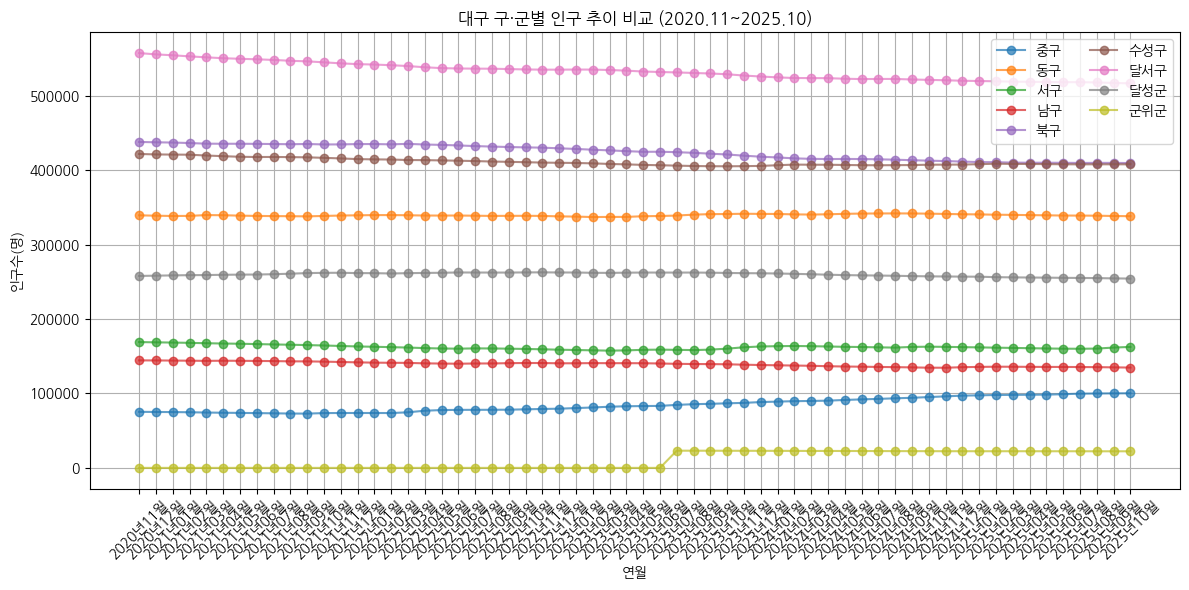

In [ ]:

# X축: 컬럼 이름에서 연월만 추출
x_labels = [col.split('_')[0] for col in pop_cols]

# 그래프 그리기
for 구군명 in df['구군'].unique():
    sub = df[df['구군'] == 구군명]
    
    # 인구 데이터 숫자형으로 변환
    y = sub[pop_cols].iloc[0].replace(',', '', regex=True).astype(float).tolist()
    
    plt.plot(x_labels, y, marker='o', alpha=0.7, label=구군명)

# 그래프 설정
plt.title('대구 구·군별 인구 추이 비교 (2020.11~2025.10)')
plt.xlabel('연월')
plt.ylabel('인구수(명)')
plt.legend(ncol=2)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

c:\Users\kdt008\anaconda3\envs\DATA_311\Lib\site-packages\matplotlib\transforms.py:2437: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),


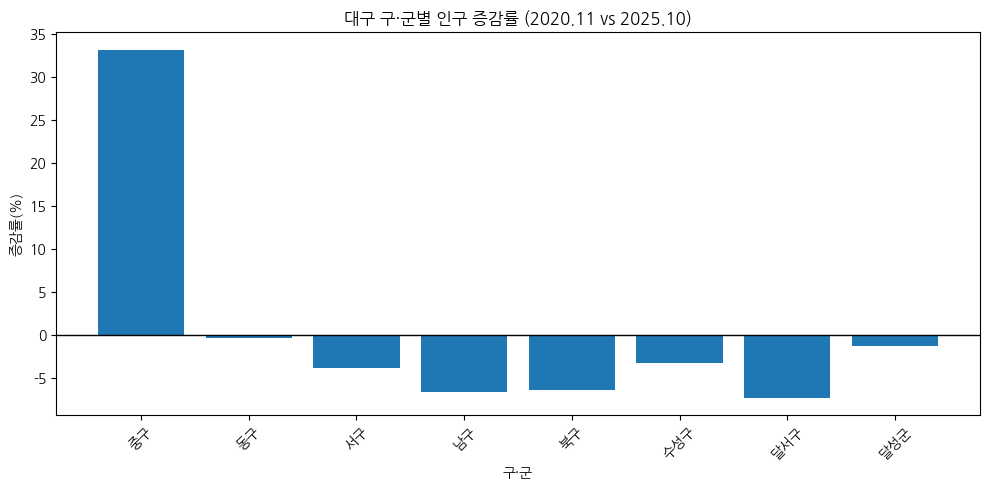

In [ ]:
# 4. 시작 vs 끝 인구 비교
df['시작인구'] = df[pop_cols[0]].replace(',', '', regex=True).astype(float)
df['끝인구'] = df[pop_cols[-1]].replace(',', '', regex=True).astype(float)
df['증감률(%)'] = (df['끝인구'] - df['시작인구']) / df['시작인구'] * 100

plt.figure(figsize=(10,5))
plt.bar(df['구군'], df['증감률(%)'])
plt.title('대구 구·군별 인구 증감률 (2020.11 vs 2025.10)')
plt.xlabel('구·군')
plt.ylabel('증감률(%)')
plt.axhline(0, color='black', linewidth=1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


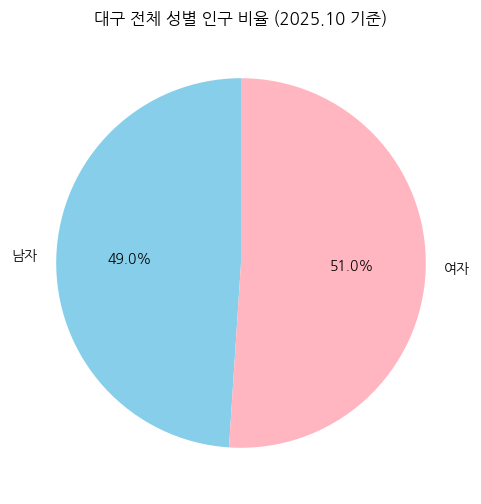

In [ ]:

# 5. 성별 비율 (파이그래프)
male_sum = df[male_cols[-1]].replace(',', '', regex=True).astype(float).sum()
female_sum = df[female_cols[-1]].replace(',', '', regex=True).astype(float).sum()

plt.figure(figsize=(6,6))
plt.pie(
    [male_sum, female_sum],
    labels=['남자', '여자'],
    autopct='%.1f%%',
    startangle=90,
    colors=['skyblue', 'lightpink']
)
plt.title('대구 전체 성별 인구 비율 (2025.10 기준)')
plt.show()
